<img src="https://github.com/r9aman/fbEDAdata/blob/master/fb.PNG?raw=true" alt = "fb" style="width:228px;height:128px;" />

# Exploratory Data Analysis of Facebook Data

## 1. Problem Statement

- As a software industry, we have to give insights about the application usage behavior by users and to come up with database solution
- We will also detect abnormal user profile present in the dataset and detect the fake account
- We will start EDA of the Facebook data of around 99k user around the world

## 2. Data Loading and Description

- The facebook dataset consists the information about its __Users__ around the world. 
- Various features of facebook application are present in the dataset like, __Age__, __Gender__, __Tenure__, __Likes__ etc.
- The dataset comprises of __99003 observations of 15 columns__. Below is a table showing names of all the columns and their description.

| Column Name           | Description                                                                  |
| --------------------- |:-------------                                                               :| 
| userid                | User Identity                                                                | 
| age                   | Age of User                                                                  |  
| dob_day               | Birth Day                                                                    | 
| dob_year              | Birth Year                                                                   |   
| dob_month             | Birth Month                                                                  |
| gender                | Gender of User                                                               |
| tenure                | Number of days since profile creation on facebook                            |
| friend_count          | Number of friends a particular user has                                      |
| friendship_initiated  | Number of friend request sent                                                |
| likes                 | Number of likes of a user given to different users                           |
| likes_received        | Number of likes received from different users                                |
| mobile_likes          | Number of likes of a user given to different users using facebook mobile app |
| mobile_likes_received | Number of likes received from different users using facebook mobile app      |
| www_likes             | Number of likes of a user given to different users using facebook website    |
| www_likes_received    | Number of likes received from different users using facebook website         |

### About Facebook

__Facebook__, is an American online social media and social networking service company based in Menlo Park, California. It was founded by Mark Zuckerberg, along with fellow Harvard College students and roommates Eduardo Saverin, Andrew McCollum, Dustin Moskovitz and Chris Hughes.

The Facebook service can be accessed from devices with Internet connectivity, such as personal computers, tablets and smartphones. After registering, users can create a customized profile revealing information about themselves. They can post text, photos and multimedia which is shared with any other users that have agreed to be their __"friend"__. Users can also use various embedded apps, join common-interest groups, and receive notifications of their friends' activities. Facebook claimed that had more than 2.3 billion monthly active users as of December 2018. However, it faces a big problem of fake accounts. It caught 3 billion fake accounts, but the ones it misses are the real problem. Many critics questioned whether Facebook knows how many actual users it has. Facebook is one of the world's most valuable companies.

### Importing Packages

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
sns.set()
sns.set(style="whitegrid")

from subprocess import check_output

### Importing the Dataset

In [3]:
fb_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv")

## 3. Data Profiling

### 3.1 Understanding the Dataset

In [4]:
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [5]:
fb_data.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [6]:
fb_data.shape

(99003, 15)

__Facebook__ data has __99003 rows__ and __15 columns__

In [7]:
fb_data.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [8]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [9]:
fb_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [10]:
fb_data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

- From the above output we can see that __gender__ column contains __maximum null values__.
- Also __tenure__ column has 2 __null values__ 

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [11]:
profile = pandas_profiling.ProfileReport(fb_data)

profile.to_file(output_file="facebook_data_before_preprocessing.html")

We can run the __facebook_data_before_preprocessing.html__ in browser and see various useful insights from it.

Based on the above profiling data we can preprocess the dataset.

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Dropping missing entries of __gender.__
    - Dropping missing entries of __tenure.__
    - Typecasting the __tenure__ column to __int64__
    - Dropping the columns __dob_day__ and __dob_month__ as it is not required since __age__ and __dob_year__ is present.
    - Adding one more column __age_group__ to get insights regrding the particular __age group__ say, __Teenage__, __Adult__, __Senior citizen__.

In [11]:
fb_data.drop(fb_data[fb_data.gender.isnull() == True].index, inplace=True)

In [12]:
fb_data.drop(fb_data[fb_data.tenure.isnull() == True].index, inplace=True)

In [13]:
fb_data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [14]:
fb_data.tenure = fb_data.tenure.astype(np.int64)

In [15]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99002
Data columns (total 15 columns):
userid                   98826 non-null int64
age                      98826 non-null int64
dob_day                  98826 non-null int64
dob_year                 98826 non-null int64
dob_month                98826 non-null int64
gender                   98826 non-null object
tenure                   98826 non-null int64
friend_count             98826 non-null int64
friendships_initiated    98826 non-null int64
likes                    98826 non-null int64
likes_received           98826 non-null int64
mobile_likes             98826 non-null int64
mobile_likes_received    98826 non-null int64
www_likes                98826 non-null int64
www_likes_received       98826 non-null int64
dtypes: int64(14), object(1)
memory usage: 12.1+ MB


In [16]:
fb_data.drop(['dob_day','dob_month'], axis=1, inplace=True)

In [17]:
fb_data['age_group'] = fb_data.apply(lambda x: '0-15' if x['age']<=15 else('16-20' if x['age']<=20 else('21-30' if x['age']<=30 else('31-45' if x['age']<=45 else('46-65' if x['age']<=65 else '>66')))), axis=1)

In [18]:
fb_data.head(2)

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,1999,male,266,0,0,0,0,0,0,0,0,0-15
1,1192601,14,1999,female,6,0,0,0,0,0,0,0,0,0-15


In [19]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99002
Data columns (total 14 columns):
userid                   98826 non-null int64
age                      98826 non-null int64
dob_year                 98826 non-null int64
gender                   98826 non-null object
tenure                   98826 non-null int64
friend_count             98826 non-null int64
friendships_initiated    98826 non-null int64
likes                    98826 non-null int64
likes_received           98826 non-null int64
mobile_likes             98826 non-null int64
mobile_likes_received    98826 non-null int64
www_likes                98826 non-null int64
www_likes_received       98826 non-null int64
age_group                98826 non-null object
dtypes: int64(12), object(2)
memory usage: 11.3+ MB


### 3.4 Post Profiling

In [22]:
profile = pandas_profiling.ProfileReport(fb_data)
profile.to_file(output_file="facebook_data_after_preprocessing.html")

After preprocessing of data, we have come up with some insights like:
- __Minimum__, __maximum__, __mean__, __Distinct count__, value of all numerical columns, __age__, __friend_count__, __tenure__, __likes__ etc
- Now we have __98826 rows__ and __14 columns__
- We can see the __corelation__ between various column of dataset

## 4. Questions

### 4.1 What is the gender distribution of dataset?

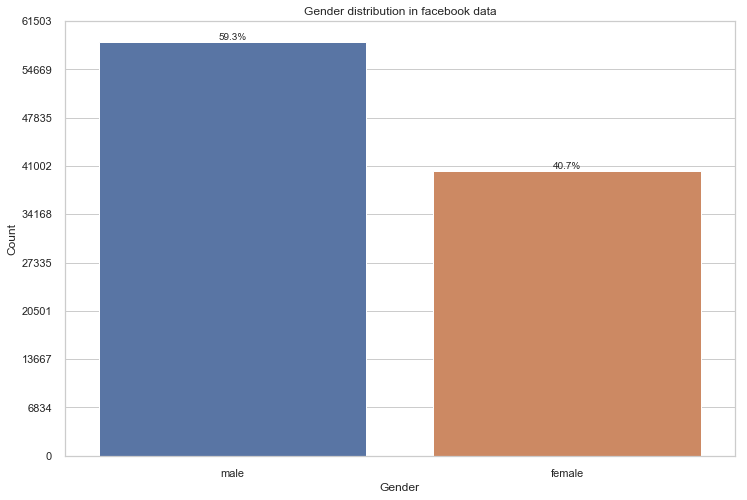

In [20]:
ncount = len(fb_data)

plt.figure(figsize=(12,8))
ax = sns.countplot(x="gender", data=fb_data)
plt.title('Gender distribution in facebook data')
plt.xlabel('Gender')
plt.ylabel('Count')


# set the alignment of the text
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

We can see, there are __more numbers of Male__ present in the dataset

### 4.2 Number of users among different age group of dataset?

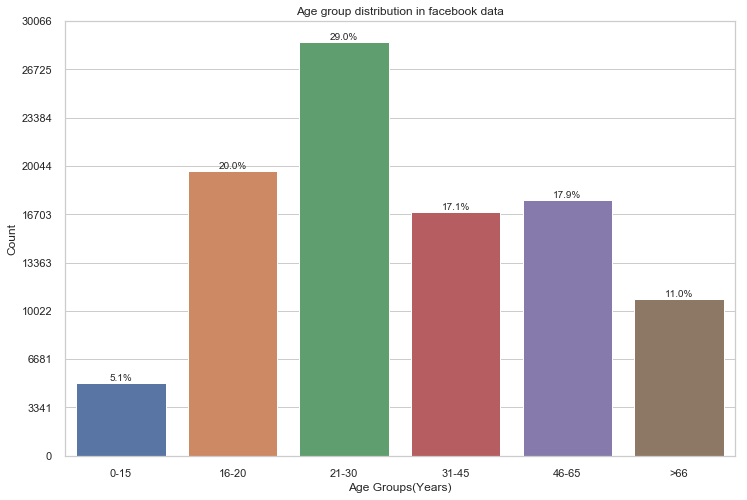

In [21]:
plt.figure(figsize=(12,8))

ncount = len(fb_data)
ax = sns.countplot(x="age_group", data=fb_data)

plt.title('Age group distribution in facebook data')
plt.xlabel('Age Groups(Years)')
plt.ylabel('Count')

# set the alignment of the text
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

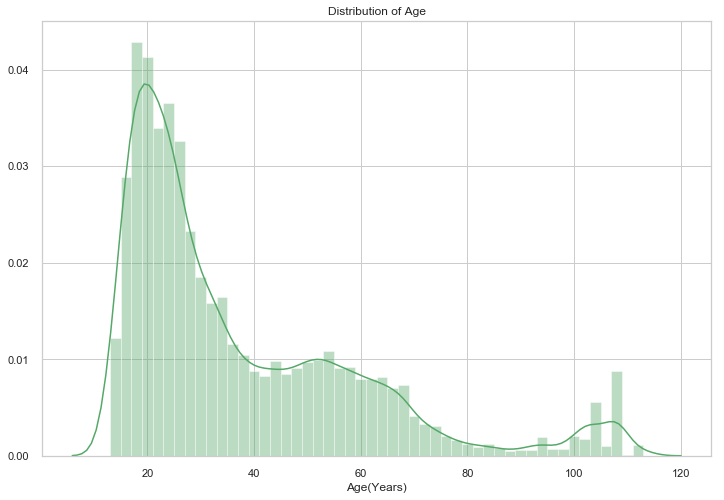

In [23]:
plt.figure(figsize=(12,8))
sns.distplot(fb_data['age'],color ='g')
plt.title('Distribution of Age')
plt.xlabel('Age(Years)')
plt.show()

- We can see that __age group 21-30 years__ has maximum number of users followed by __16-20 years__.
- Above graph shows the __total number__ and __percentage__ of users among different age group

### 4.3 What is the gender distribution among different age group of dataset?

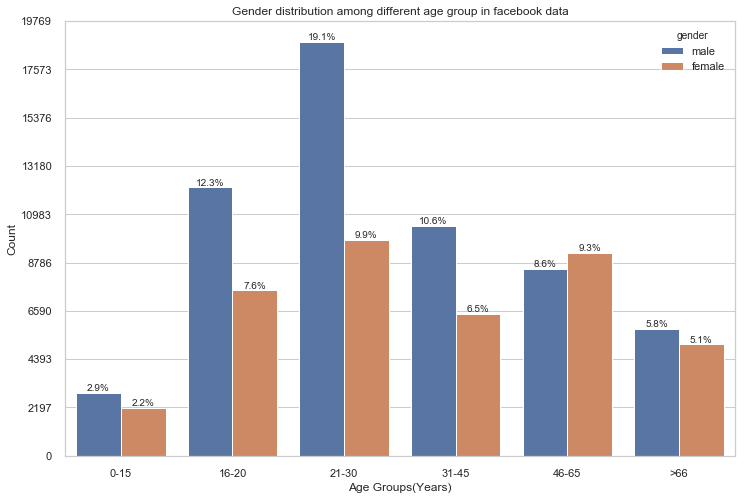

In [24]:
ncount = len(fb_data)

plt.figure(figsize=(12,8))
ax = sns.countplot(x="age_group", hue='gender', data=fb_data)
plt.title('Gender distribution among different age group in facebook data')
plt.xlabel('Age Groups(Years)')
plt.ylabel('Count')

# set the alignment of the text
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

- We can see that __Male__ users are more active in almost all group as per the dataset.
- However, in age group __21-30 years__, the number of __Male__ users are around __two times__ than the __Female__.

### 4.4 How Tenure is distributed ?

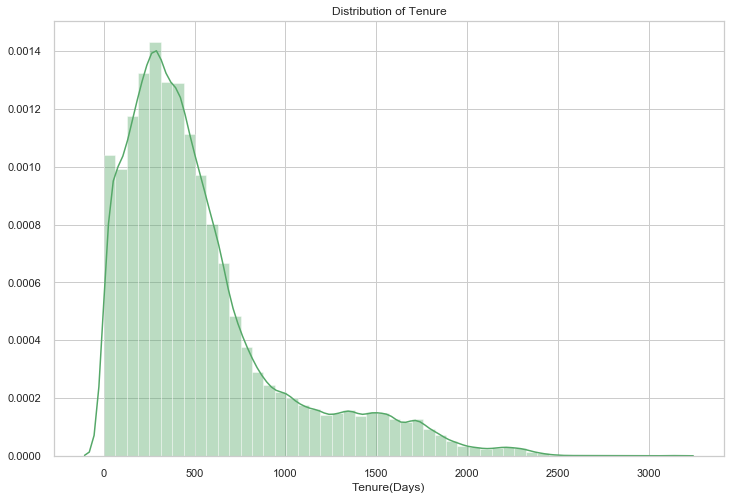

In [27]:
plt.figure(figsize=(12,8))
sns.distplot(fb_data['tenure'],color ='g')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure(Days)')
plt.show()

We can see that the dataset contains more entries with __Tenure between 100-600 days__

## 5. Data correlation between each other

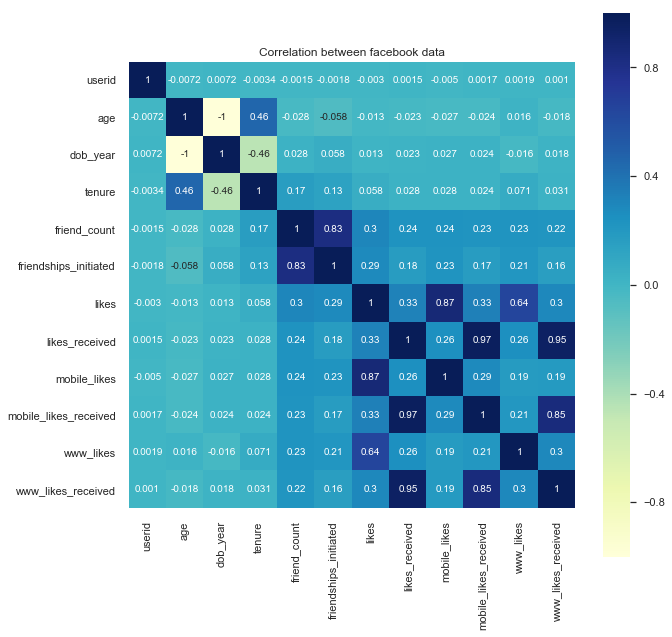

In [28]:
data_correlation = fb_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_correlation,vmax=1,square=True,annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between facebook data')
plt.show()

Here we can see the correlation between various data and their relative indices.

Now we will analize the data correlation of individual data with rispect to others. 

### 5.1 Creation of new derived dataset from preprocessed dataset

We have to analize all numerical data according to __gender__ and __age group__

So we'll pick only column with required data

In [29]:
fb_data_likes = fb_data[['gender', 'age_group', 'friend_count', 'friendships_initiated', 'likes', 'likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']].copy()

In [30]:
fb_data_likes.head(2)

,gender,age_group,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,male,0-15,0,0,0,0,0,0,0,0
1,female,0-15,0,0,0,0,0,0,0,0


Finally the new dataset __fb_total_likes__ will contain sum of all rows of respective numerical column according to __gender__ and __age_group__

In [31]:
fb_t = fb_data_likes.groupby(['age_group', 'gender']).sum()
fb_total_likes = fb_t.reset_index(level=['gender','age_group'])
fb_total_likes

,age_group,gender,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,0-15,female,970553,438558,801417,841375,525876,482157,275541,359217
1,0-15,male,503254,337290,235580,149998,161574,90607,74006,59391
2,16-20,female,3583074,1585067,2874294,3879684,1887755,2320963,986538,1558719
3,16-20,male,2906879,1901680,1310078,1239448,894804,739375,415274,500073
4,21-30,female,2032981,1008054,2161038,2279513,1624315,1400186,536722,879327
5,21-30,male,2803593,1854813,1376264,1083156,1093373,676710,282890,406446
6,31-45,female,806547,447296,1488061,1155153,1139608,691924,348451,463229
7,31-45,male,952754,577812,600814,467051,484269,293888,116545,173163
8,46-65,female,1091485,598189,2211668,1344644,1278247,669396,933421,675248
9,46-65,male,864364,471254,742357,478223,478369,263496,263988,214727


We will create one more dataset to analize distributin of data among gender

In [32]:
fb_data_temp = fb_data[['gender', 'friend_count', 'friendships_initiated', 'likes', 'likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']].copy()
fb_temp = fb_data_temp.groupby('gender').sum()
fb_temp.head(2)

,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,,,,,
female,9740073,4584801,10467978,10121203,6960420,5921375,3507554,4199824
male,9666787,6037023,4959923,3977851,3529747,2391753,1430175,1586098


#### Now we will analize relation using bar plot of each numerical column one by one

### 5.2 Total Likes distribution for each age group in facebook data 

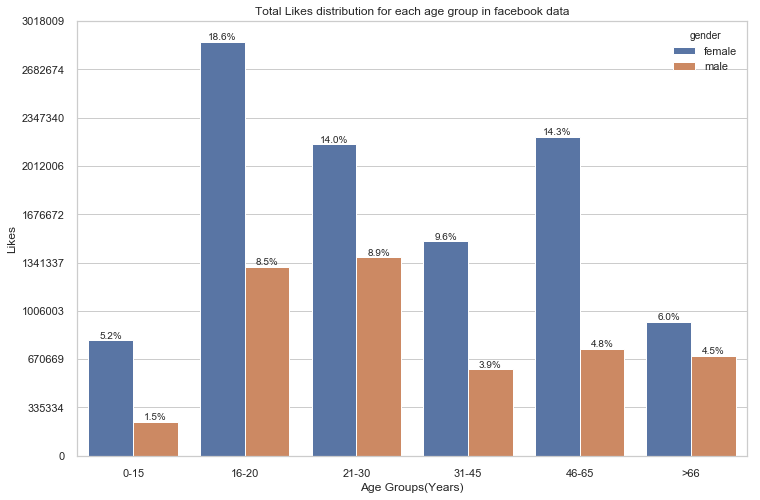

In [33]:
tsum = fb_total_likes['likes'].sum()

plt.figure(figsize=(12,8))

ax = sns.barplot(x='age_group', y='likes', hue='gender', data=fb_total_likes)
plt.title('Total Likes distribution for each age group in facebook data')
plt.xlabel('Age Groups(Years)')
plt.ylabel('Likes')

# set the alignment of the text
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/tsum), (x.mean(), y), 
            ha='center', va='bottom') 

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

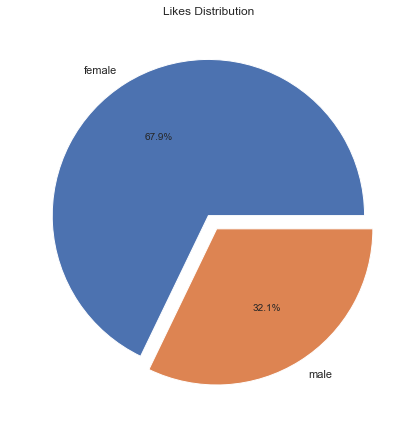

In [35]:
plt.figure(figsize=(10,6))
fb_temp.likes.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=False)
plt.ylabel('')
plt.title('Likes Distribution')
plt.tight_layout()

- Total Likes by __Male : 32.1%__ 
- Total Likes by __Female : 67.9%__

### 5.3 Total Mobile Likes distribution for each age group in facebook data

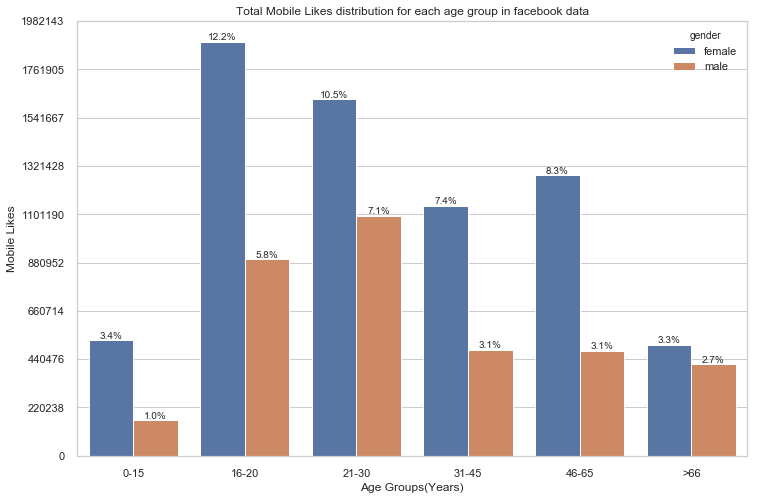

In [36]:
plt.figure(figsize=(12,8))

tsum = fb_total_likes['likes'].sum()
ax = sns.barplot(x='age_group', y='mobile_likes', hue='gender', data=fb_total_likes)

plt.title('Total Mobile Likes distribution for each age group in facebook data')
plt.xlabel('Age Groups(Years)')
plt.ylabel('Mobile Likes')

# set the alignment of the text
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/tsum), (x.mean(), y), 
            ha='center', va='bottom')
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

__Mobile Likes is 67.9% of Total Likes__
- __Mobile Likes__ by __Male is 22.8% of Total Likes__
- __Mobile Likes__ by __Female is 45.1% of Total Likes__

### 5.4 Total Web Likes distribution for each age group in facebook data

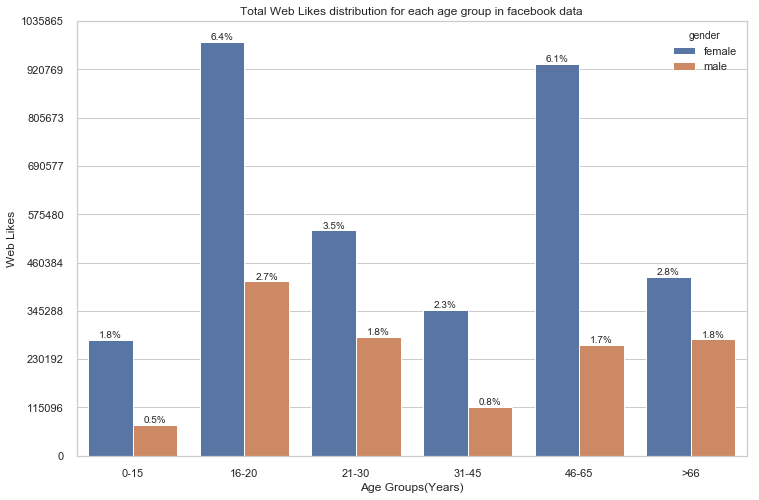

In [37]:
plt.figure(figsize=(12,8))

tsum = fb_total_likes['likes'].sum()
ax = sns.barplot(x='age_group', y='www_likes', hue='gender', data=fb_total_likes)

plt.title('Total Web Likes distribution for each age group in facebook data')
plt.xlabel('Age Groups(Years)')
plt.ylabel('Web Likes')

# set the alignment of the text
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/tsum), (x.mean(), y), 
            ha='center', va='bottom')
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

__Web Likes is 32.1 % of Total Likes__
- __Web Likes__ by __Male is 9.3% of Total Likes__
- __Web Likes__ by __Female is 22.8% of Total Likes__

### 5.5 Total Likes Received distribution for each age group in facebook data

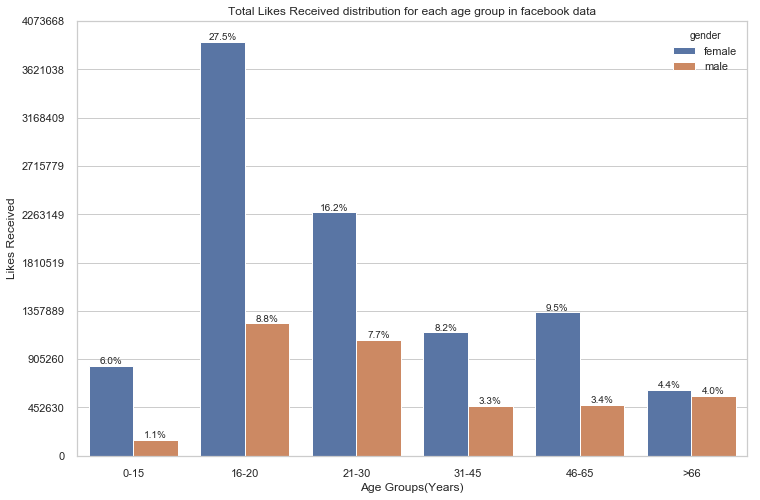

In [38]:
plt.figure(figsize=(12,8))

tsum = fb_total_likes['likes_received'].sum()
ax = sns.barplot(x='age_group', y='likes_received', hue='gender', data=fb_total_likes)

plt.title('Total Likes Received distribution for each age group in facebook data')
plt.xlabel('Age Groups(Years)')
plt.ylabel('Likes Received')

# set the alignment of the text
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/tsum), (x.mean(), y), 
            ha='center', va='bottom')
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

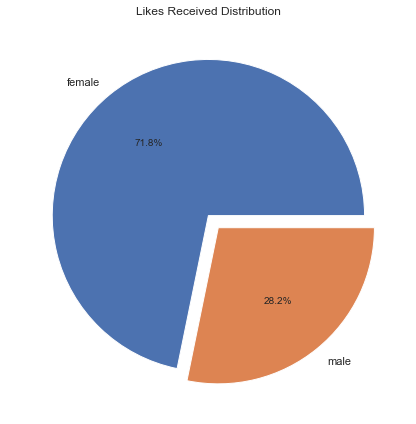

In [40]:
plt.figure(figsize=(10,6))
fb_temp.likes_received.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=False)
plt.ylabel('')
plt.title('Likes Received Distribution')
plt.tight_layout()

__Female received more likes than Male__
- __Likes Received__ by __Male : 28.2%__ 
- __Likes Received__ by __Female : 71.8%__

Here we can see that, though __number of Male__ are more in the dataset, still __Female received more likes__

### 5.6 Total Mobile Likes Received distribution for each age group in facebook data

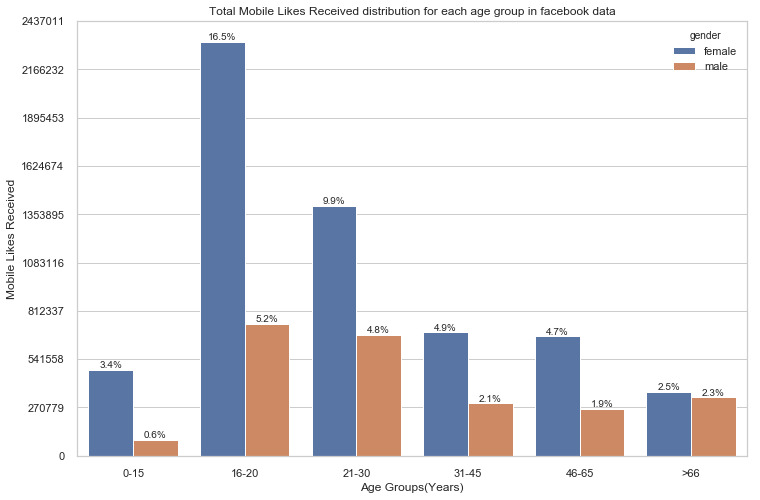

In [41]:
plt.figure(figsize=(12,8))

tsum = fb_total_likes['likes_received'].sum()
ax = sns.barplot(x='age_group', y='mobile_likes_received', hue='gender', data=fb_total_likes)

plt.title('Total Mobile Likes Received distribution for each age group in facebook data')
plt.xlabel('Age Groups(Years)')
plt.ylabel('Mobile Likes Received')

# set the alignment of the text
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/tsum), (x.mean(), y), 
            ha='center', va='bottom') 
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

__Mobile Likes Received is 58.8% of Total Likes Received__
- __Mobile Likes Received__ by __Male is 16.9% of Total Likes Received__ 
- __Mobile Likes Received__ by __Female is 41.9% of Total Like Received__

### 5.7 Total Web Likes Received distribution for each age group in facebook data

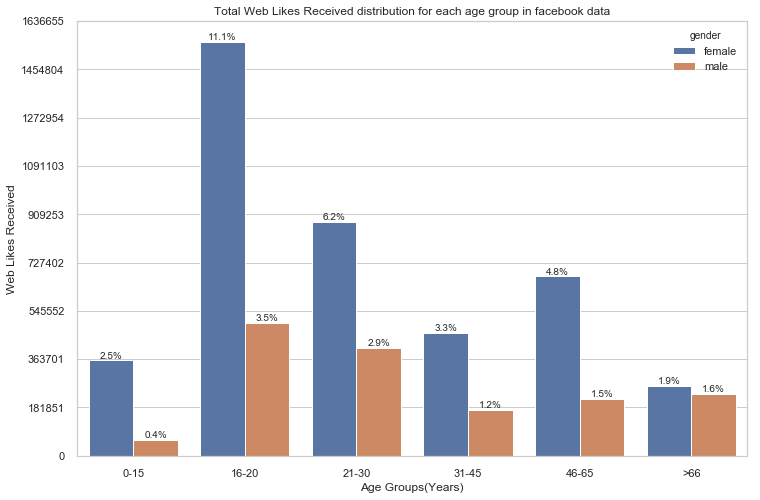

In [42]:
plt.figure(figsize=(12,8))

tsum = fb_total_likes['likes_received'].sum()
ax = sns.barplot(x='age_group', y='www_likes_received', hue='gender', data=fb_total_likes)

plt.title('Total Web Likes Received distribution for each age group in facebook data')
plt.xlabel('Age Groups(Years)')
plt.ylabel('Web Likes Received')

# set the alignment of the text
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/tsum), (x.mean(), y), 
            ha='center', va='bottom') 
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

__Web Likes Received is 40.9% of Total Likes Received__
- __Web Likes Received__ by __Male is 11.1% of Total Likes Received__ 
- __Web Likes Received__ by __Female is 29.8% of Total Like Received__

### 5.8 Total Friend Count distribution for each age group in facebook data

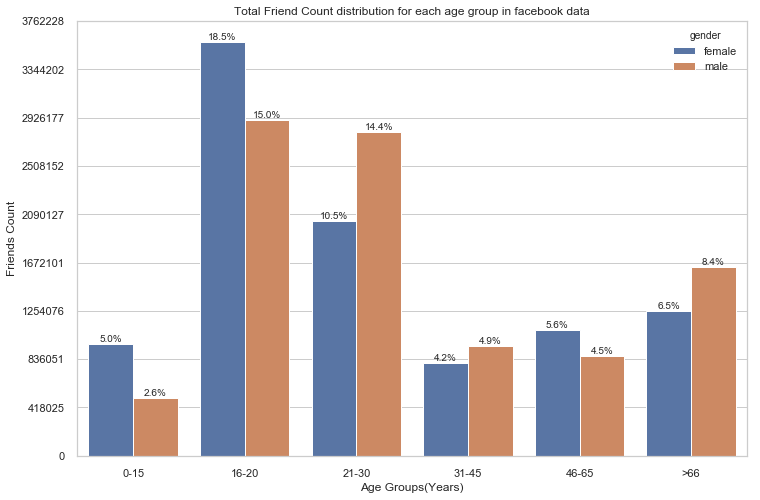

In [43]:
plt.figure(figsize=(12,8))

tsum = fb_total_likes['friend_count'].sum()
ax = sns.barplot(x='age_group', y='friend_count', hue='gender', data=fb_total_likes)

plt.title('Total Friend Count distribution for each age group in facebook data')
plt.xlabel('Age Groups(Years)')
plt.ylabel('Friends Count')

# set the alignment of the text
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/tsum), (x.mean(), y), 
            ha='center', va='bottom') 
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

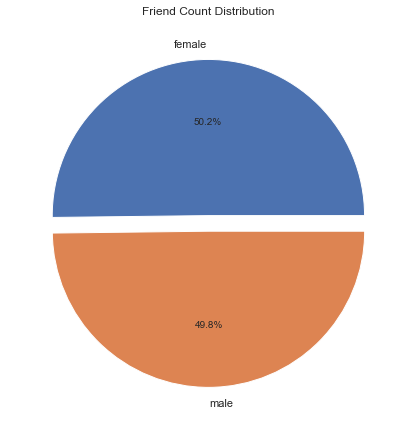

In [45]:
plt.figure(figsize=(10,6))
fb_temp.friend_count.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=False)
plt.ylabel('')
plt.title('Friend Count Distribution')
plt.tight_layout()

 - __Friend count of Female : 50.2%__
 - __Friend count of Male : 49.8%__
 
 Here we can see that, though __number of Male__ are more in the dataset, still __Female have more Friend Count__

### 5.9 Total Friendship Initiated distribution for each age group in facebook data

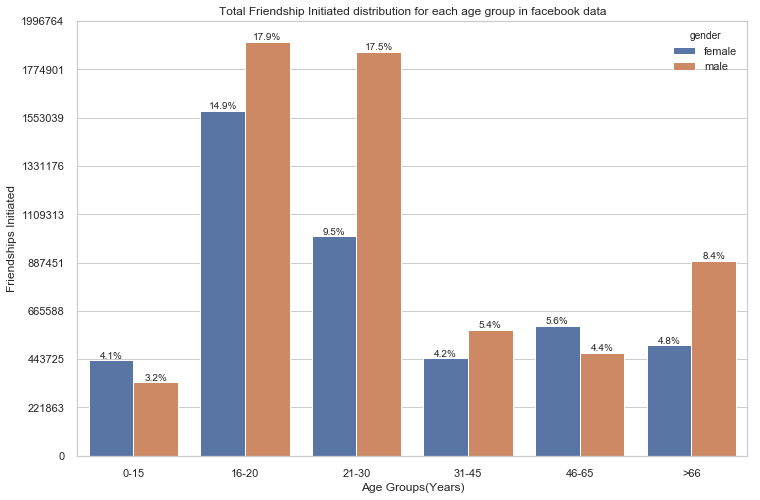

In [46]:
plt.figure(figsize=(12,8))

tsum = fb_total_likes['friendships_initiated'].sum()
ax = sns.barplot(x='age_group', y='friendships_initiated', hue='gender', data=fb_total_likes)

plt.title('Total Friendship Initiated distribution for each age group in facebook data')
plt.xlabel('Age Groups(Years)')
plt.ylabel('Friendships Initiated')

# set the alignment of the text
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/tsum), (x.mean(), y), 
            ha='center', va='bottom') 
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(10))

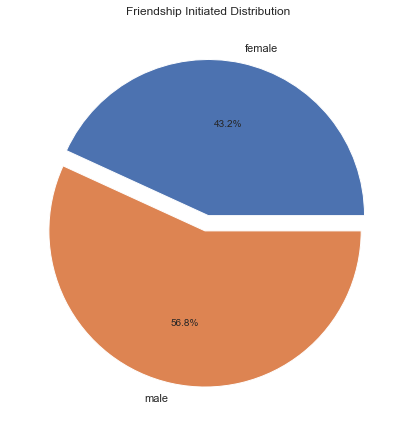

In [47]:
plt.figure(figsize=(10,6))
fb_temp.friendships_initiated.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=False)
plt.ylabel('')
plt.title('Friendship Initiated Distribution')
plt.tight_layout()

- __Friend Request Sent__ by __Male : 56.8%__
- __Friend Request Sent__ by __Female : 43.2%__

 Here we can see that __Male__ sends more __Friend Request__ than __Female__

## 6. Extreme values

Now we will look into the __five maximum values__ of each numerical data column and analize how the __remaining data is varying__

### 6.1 Extreme values of column "likes"

In [41]:
fb_sort_likes = fb_data.sort_values(by='likes', ascending=False)
fb_sort_likes.head()

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
97007,1684195,23,1990,male,529,1056,665,25111,3447,25111,3111,0,336,21-30
93064,1656477,68,1945,male,550,584,347,21652,10220,21652,8584,0,1636,>66
86119,1489463,25,1988,female,131,351,88,16732,4913,16732,4679,0,234,21-30
98929,1429178,18,1995,female,888,4733,519,16583,16743,1718,10104,14865,6639,16-20
96999,1267229,24,1989,female,484,1171,695,14799,22513,12934,17955,1865,4558,21-30


### 6.2 Extreme values of column "likes_received"

In [42]:
fb_sort_likes_received = fb_data.sort_values(by='likes_received', ascending=False)
fb_sort_likes_received.head()

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
94906,1674584,17,1996,female,401,818,395,1016,261197,659,131244,357,129953,16-20
77121,1441676,20,1993,female,253,230,73,2078,178166,1982,138561,96,39605,16-20
98822,1715925,23,1990,female,705,4077,793,1877,152014,80,89911,1797,62103,21-30
98994,2063006,20,1993,female,402,1988,332,7351,106025,7248,73333,103,32692,16-20
98878,1053087,23,1990,male,596,4320,836,2996,82623,179,43410,2817,39213,21-30


### 6.3 Extreme values of column "friend_count"

In [43]:
fb_sort_friend = fb_data.sort_values(by='friend_count', ascending=False)
fb_sort_friend.head()

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
98159,2090699,103,1910,female,783,4923,96,26,80,26,71,0,9,>66
98026,1660276,66,1947,male,716,4917,431,0,114,0,69,0,45,>66
98184,1926655,19,1994,female,469,4863,241,37,166,36,117,1,49,16-20
98797,1685573,38,1975,male,1930,4845,942,1768,4886,1208,1619,560,3267,31-45
98087,1386477,61,1952,male,1210,4844,561,7,247,5,96,2,151,46-65


### 6.4 Extreme values of column "friendships_initiated"

In [44]:
fb_sort_frnd_in = fb_data.sort_values(by='friendships_initiated', ascending=False)
fb_sort_frnd_in.head()

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
98993,1654565,19,1994,male,394,4538,4144,4501,15088,4435,5961,66,9127,16-20
98842,1052695,22,1991,female,874,4297,3654,1968,2006,1825,1632,143,374,21-30
98675,1949247,19,1994,female,434,4189,3594,927,2859,528,1290,399,1569,16-20
98567,1205425,60,1953,female,1562,4794,3538,586,1318,560,960,26,358,46-65
98347,1403953,19,1994,male,519,3693,3415,170,20,170,19,0,1,16-20


### 6.5 Extreme values of column "tenure"

In [45]:
fb_sort_tenure = fb_data.sort_values(by='tenure', ascending=False)
fb_sort_tenure.head()

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
86383,1419799,111,1902,male,3139,372,40,11,21,2,13,9,8,>66
96429,1601778,100,1913,male,3139,1069,373,137,63,45,35,92,28,>66
97177,2135122,108,1905,male,3139,1343,167,18,14,0,12,18,2,>66
93775,2137369,108,1905,female,3129,720,282,421,439,176,296,245,143,>66
98689,2111567,103,1910,female,3128,4658,972,929,2756,929,1193,0,1563,>66


## 7. Observation

- Facebook dataset contains 59.3% Male and 40.7% Female data

- The age group 21-30 years has maximum number of users followed by 16-20 years

- Male users are more active in almost all group as per the dataset except the age group 46-65 years, in which more Female data is present

- The dataset contains more entries with Tenure between 100-600 days

- We have seen various correlation between data

- The total likes given by Female is 67.9% whereas only 32.1% by Male

- Specially Female of age group 16-20(18.6%) and 46-65(14.3%) years have liked more

- Out of all likes, mobile app likes are 67.9% and web likes are only 32.1%

- The total likes received by Female is 71.8% whereas Male have received only 28.2%

- Here we can see that, though number of Male are more in the dataset, still Female received more likes

- The Female of age group 16-20 years have received maximum numbers of likes 27.5%, followed by 16.2% by age group 21-30 years

- Out of all, received likes by mobile app are 58.8% and by web 40.9%

- Though number of Male are more in the dataset, still Female have more Friend Count 50.2%

- The Female of age group 16-20 years have maximum friend counts 18.5%

- Male have sent more friend request than Female, i.e. Male 56.8% and Female 43.2%

- The Male of age group 16-20 years and 21-30 years have sent more friend request with 17.9% and 17.5% respectively

## 8. Conclusion

Female are more active on facebook as compared to Male
- So Facebook will prefer to create a different database for Female users
- Also Female uploads more pictures and videos on facebook so it require a huge database
- Whereas Male database can be of little less size

Maximum users prefer to use Facebook Mobile app rather than Web application
- So Facebook will allocate more resources and manpower to manage and monitor Mobile application rather than Web application
- Facebook can deploy extra features to their Mobile app first, as more users are active through Mobile app